**Primeira parte: Análise de Portfólio**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [ ]:
acoes = ['ITSA4.SA', 'PETR3.SA', 'GOLL4.SA', 'VIVT3.SA','RENT3.SA', 'VALE3.SA']

ydata = yf.download(acoes, '2015-01-01', '2024-01-31', '1d');
dados = ydata["Adj Close"]

[*********************100%%**********************]  6 of 6 completed


In [ ]:
dados = dados *100 / dados.iloc[0]
display(dados)

Ticker,GOLL4.SA,ITSA4.SA,PETR3.SA,RENT3.SA,VALE3.SA,VIVT3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,99.066048,100.327131,91.888889,95.842844,98.496219,98.016901
2015-01-06,101.467647,101.090478,89.555566,97.779020,102.443612,95.584321
2015-01-07,97.064713,104.907232,93.888892,98.804084,106.203017,98.863022
2015-01-08,95.196802,105.997732,100.222221,97.124165,107.330821,102.882052
...,...,...,...,...,...,...
2024-01-24,44.362910,301.259646,1141.621467,642.348363,554.754852,243.864975
2024-01-25,42.961976,300.654712,1194.571280,639.390247,541.104239,244.009211
2024-01-26,39.492996,302.771982,1220.755191,616.163608,551.580288,246.172844


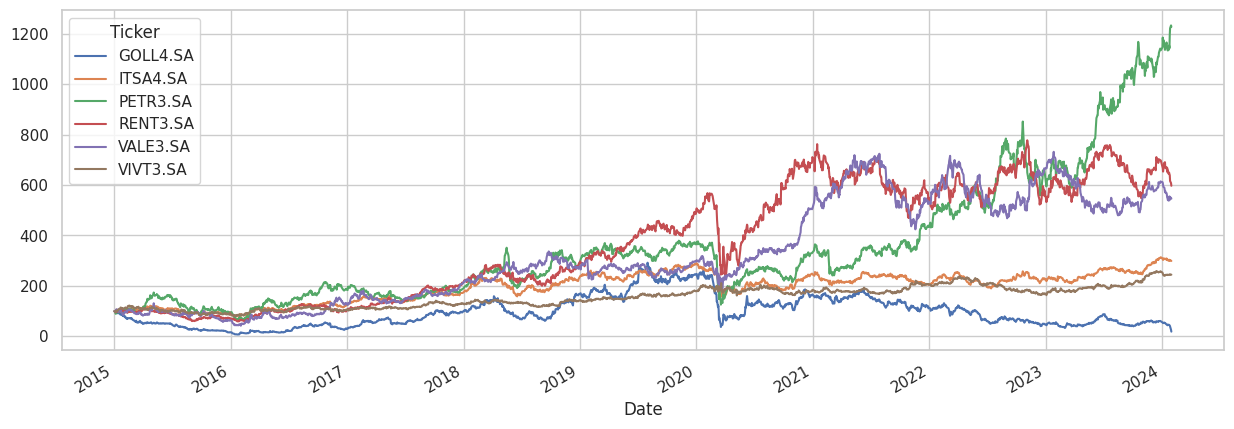

In [ ]:
dados.plot(figsize = (15,5));

In [ ]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_acc = (dados.iloc[-1] / dados.iloc[0])-1
print(f"Retorno acumulado: {round(ret_acc, 2)}\n")

Retorno acumulado: Ticker
GOLL4.SA    -0.81
ITSA4.SA     1.99
PETR3.SA    11.27
RENT3.SA     4.97
VALE3.SA     4.46
VIVT3.SA     1.45
dtype: float64



In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print(f"Retorno anualizado: {round(ret_aa, 2)}\n")

Retorno anualizado: Ticker
GOLL4.SA   -0.28
ITSA4.SA    0.25
PETR3.SA    0.65
RENT3.SA    0.43
VALE3.SA    0.40
VIVT3.SA    0.20
dtype: float64



In [ ]:
vol_aa = dados_chg.std()*np.sqrt(252)
print(f"Vol anualizada: {round(vol_aa, 2)}\n")

Vol anualizada: Ticker
GOLL4.SA    0.77
ITSA4.SA    0.30
PETR3.SA    0.49
RENT3.SA    0.42
VALE3.SA    0.45
VIVT3.SA    0.29
dtype: float64



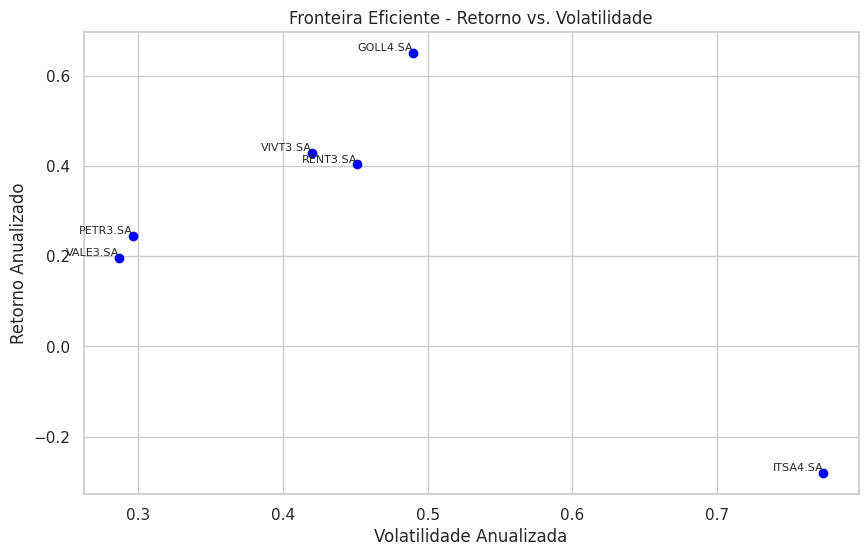

In [ ]:

# Plotar gráfico de retorno anualizado e volatilidade anualizada das ações
plt.figure(figsize=(10, 6))
plt.scatter(vol_aa, ret_aa, color='blue')

for i in range(len(acoes)):
    plt.text(vol_aa[i], ret_aa[i], acoes[i], fontsize=8, ha='right', va='bottom')

plt.xlabel('Volatilidade Anualizada')
plt.ylabel('Retorno Anualizado')
plt.title('Fronteira Eficiente - Retorno vs. Volatilidade')
plt.grid(True)
plt.show()

In [ ]:
#Calculo da correlação dos dados
dados_chg.corr()

Ticker,GOLL4.SA,ITSA4.SA,PETR3.SA,RENT3.SA,VALE3.SA,VIVT3.SA
Ticker,,,,,,
GOLL4.SA,1.000000,0.475767,0.393748,0.467294,0.255173,0.229253
ITSA4.SA,0.475767,1.000000,0.543404,0.527805,0.327819,0.378541
PETR3.SA,0.393748,0.543404,1.000000,0.407690,0.479726,0.304641
RENT3.SA,0.467294,0.527805,0.407690,1.000000,0.254829,0.294181
VALE3.SA,0.255173,0.327819,0.479726,0.254829,1.000000,0.218511
VIVT3.SA,0.229253,0.378541,0.304641,0.294181,0.218511,1.000000


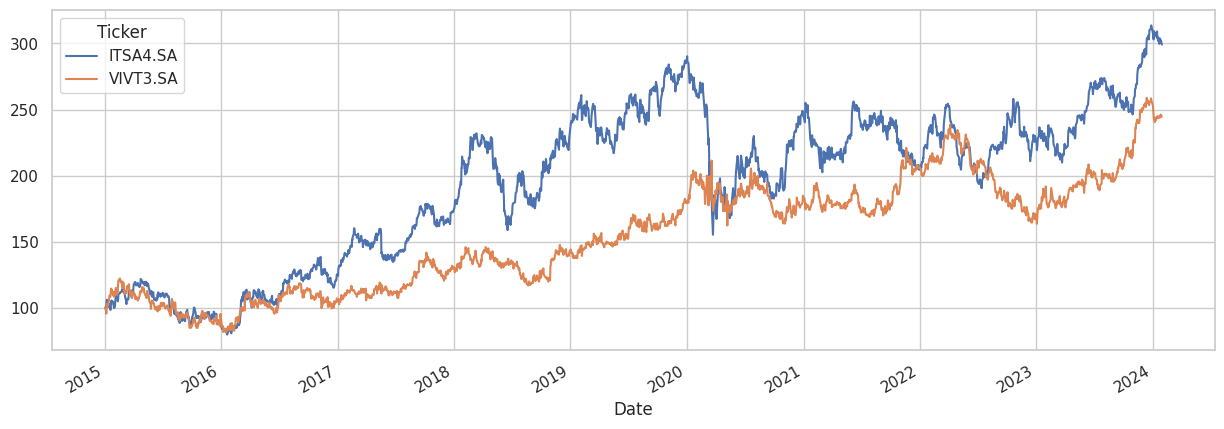

In [ ]:
dados[['ITSA4.SA', 'VIVT3.SA']].plot(figsize = (15,5));

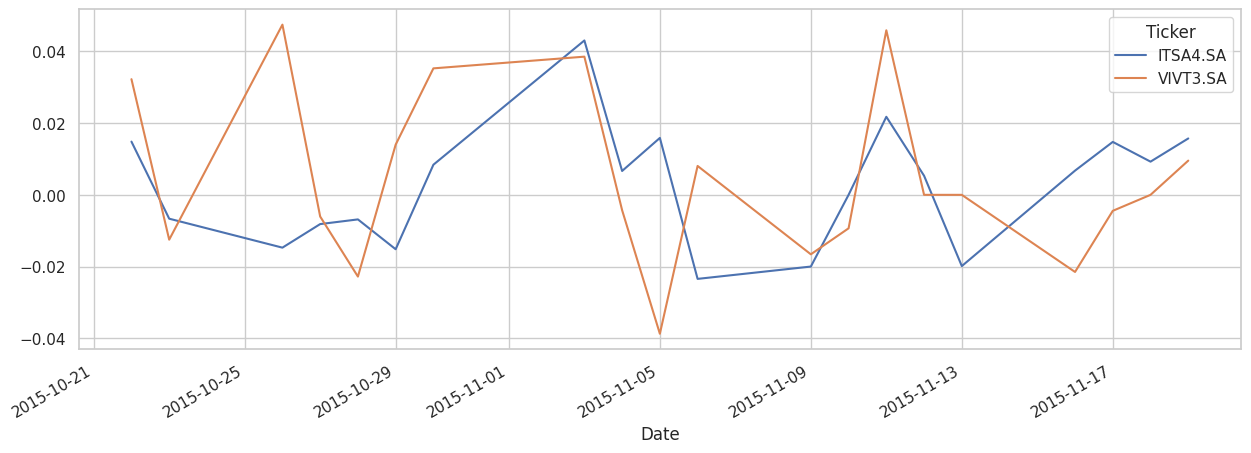

In [ ]:
dados_chg[['ITSA4.SA', 'VIVT3.SA']].iloc[200:220].plot(figsize = (15,5));

In [ ]:
port_pesos = [0, 0.5, 0, 0, 0.5, 0]
dados['PORT1'] = dados.dot(port_pesos)

In [ ]:
display(dados)

Ticker,GOLL4.SA,ITSA4.SA,PETR3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,PORT1
Date,,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,99.066048,100.327131,91.888889,95.842844,98.496219,98.016901,99.411675
2015-01-06,101.467647,101.090478,89.555566,97.779020,102.443612,95.584321,101.767045
2015-01-07,97.064713,104.907232,93.888892,98.804084,106.203017,98.863022,105.555125
2015-01-08,95.196802,105.997732,100.222221,97.124165,107.330821,102.882052,106.664277
...,...,...,...,...,...,...,...
2024-01-24,44.362910,301.259646,1141.621467,642.348363,554.754852,243.864975,428.007249
2024-01-25,42.961976,300.654712,1194.571280,639.390247,541.104239,244.009211,420.879475
2024-01-26,39.492996,302.771982,1220.755191,616.163608,551.580288,246.172844,427.176135


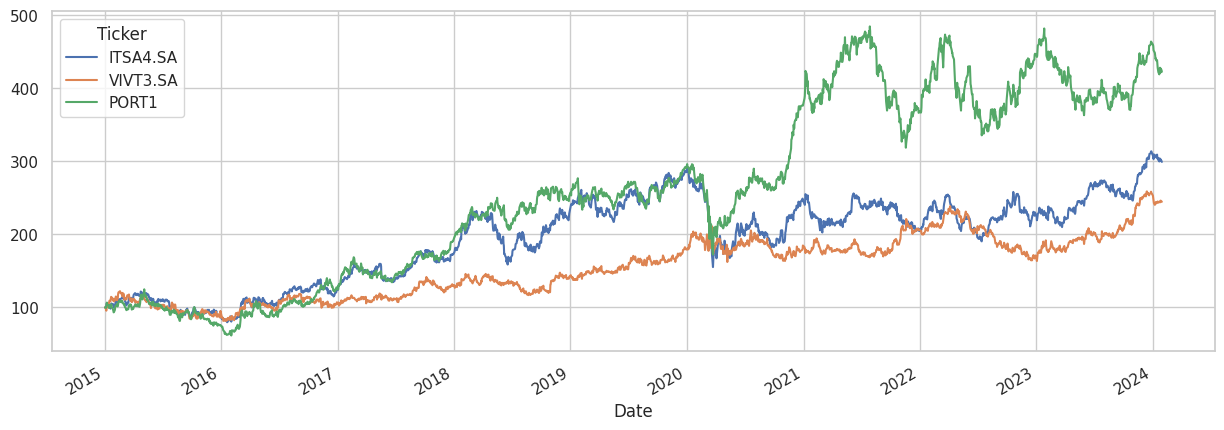

In [ ]:
dados[['ITSA4.SA', 'VIVT3.SA', 'PORT1']].plot(figsize = (15,5));

In [ ]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_acc = (dados.iloc[dados.count()[0]-1] / dados.iloc[0])-1
print(f"Retorno acumulado: {round(ret_acc, 2)}\n")
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print(f"Ret anualizado: {ret_aa, 2}\n")

Retorno acumulado: Ticker
GOLL4.SA    -0.81
ITSA4.SA     1.99
PETR3.SA    11.27
RENT3.SA     4.97
VALE3.SA     4.46
VIVT3.SA     1.45
PORT1        3.23
dtype: float64

Ret anualizado: (Ticker
GOLL4.SA   -0.281518
ITSA4.SA    0.245018
PETR3.SA    0.651047
RENT3.SA    0.429531
VALE3.SA    0.404162
VIVT3.SA    0.195924
PORT1       0.334032
dtype: float64, 2)



In [ ]:
vol_aa = dados_chg.std()*np.sqrt(252)
print(f"Vol aa: {round(vol_aa, 2)}\n")

Vol aa: Ticker
GOLL4.SA    0.77
ITSA4.SA    0.30
PETR3.SA    0.49
RENT3.SA    0.42
VALE3.SA    0.45
VIVT3.SA    0.29
PORT1       0.31
dtype: float64



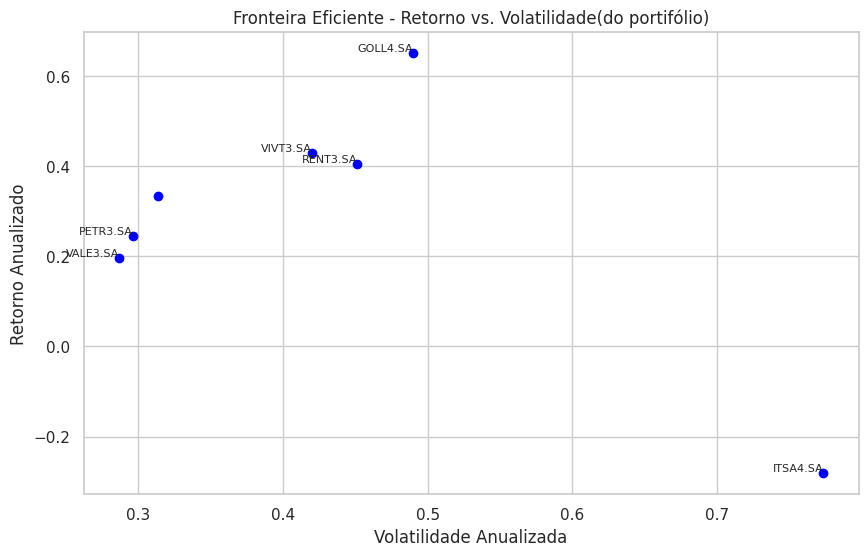

In [ ]:
# Plotar gráfico de retorno anualizado e volatilidade anualizada das ações do portifólio
plt.figure(figsize=(10, 6))
plt.scatter(vol_aa, ret_aa, color='blue')

for i in range(len(acoes)):
    plt.text(vol_aa[i], ret_aa[i], acoes[i], fontsize=8, ha='right', va='bottom')

plt.xlabel('Volatilidade Anualizada')
plt.ylabel('Retorno Anualizado')
plt.title('Fronteira Eficiente - Retorno vs. Volatilidade(do portifólio)')
plt.grid(True)
plt.show()

In [ ]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

GOLL4.SA   -93.445993
ITSA4.SA   -46.526561
PETR3.SA   -66.764119
RENT3.SA   -57.911074
VALE3.SA   -67.580275
VIVT3.SA   -33.223514
PORT1      -50.629440
dtype: float64


Text(0.5, 1.0, 'Dropdown - Ações + Portifólio')

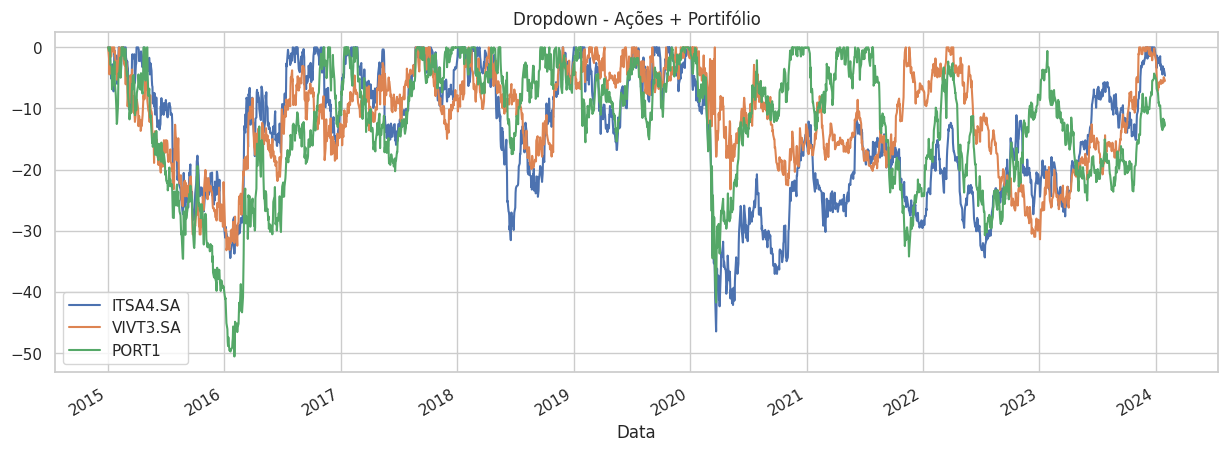

In [ ]:
ddown[['ITSA4.SA', 'VIVT3.SA', 'PORT1']].plot(figsize = (15,5));
plt.title('Dropdown - Ações + Portifólio')

**Segunda parte: Fronteira Eficiente de Markowitz**

In [ ]:
dados=dados.drop(['PORT1'], axis=1)
dados_chg=dados_chg.drop(['PORT1'], axis=1)

In [ ]:
dados

Ticker,GOLL4.SA,ITSA4.SA,PETR3.SA,RENT3.SA,VALE3.SA,VIVT3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,99.066048,100.327131,91.888889,95.842844,98.496219,98.016901
2015-01-06,101.467647,101.090478,89.555566,97.779020,102.443612,95.584321
2015-01-07,97.064713,104.907232,93.888892,98.804084,106.203017,98.863022
2015-01-08,95.196802,105.997732,100.222221,97.124165,107.330821,102.882052
...,...,...,...,...,...,...
2024-01-24,44.362910,301.259646,1141.621467,642.348363,554.754852,243.864975
2024-01-25,42.961976,300.654712,1194.571280,639.390247,541.104239,244.009211
2024-01-26,39.492996,302.771982,1220.755191,616.163608,551.580288,246.172844


In [ ]:
def calc_ret_vol(ativos, ativos_chg, port_pesos):
  port = ativos.dot(port_pesos)
  port_chg =port.pct_change()
  port_chg = port_chg.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/5))-1
  vol = port_chg.std()*np.sqrt(252)
  return ret, vol

In [ ]:
#Portfolio com 2 ativos: ITSA4 e VIVT3
points = []
min_vol_ret = [100, 0] #[vol, ret]
port_pesos = [0, 0, 0, 0, 0, 0]
for w in range(0, 101, 5):
  ret, vol = calc_ret_vol(dados, dados_chg, [0, 0,  w/100, 0, (1-w/100), 0])
  print(f"Aloc:{round(w/100, 2):.2f} {round(1-(w/100),2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
  points.append([ret, vol])
  if vol < min_vol_ret[0]:
    min_vol_ret[0] = vol
    min_vol_ret[1] = ret
    port_pesos[2] = w/100
    port_pesos[4] = 1-w/100

Aloc:0.00 1.00 Ret:0.404 Vol:0.451
Aloc:0.05 0.95 Ret:0.421 Vol:0.439
Aloc:0.10 0.90 Ret:0.438 Vol:0.428
Aloc:0.15 0.85 Ret:0.453 Vol:0.420
Aloc:0.20 0.80 Ret:0.468 Vol:0.413
Aloc:0.25 0.75 Ret:0.483 Vol:0.407
Aloc:0.30 0.70 Ret:0.496 Vol:0.404
Aloc:0.35 0.65 Ret:0.510 Vol:0.401
Aloc:0.40 0.60 Ret:0.523 Vol:0.401
Aloc:0.45 0.55 Ret:0.535 Vol:0.401
Aloc:0.50 0.50 Ret:0.547 Vol:0.403
Aloc:0.55 0.45 Ret:0.559 Vol:0.406
Aloc:0.60 0.40 Ret:0.570 Vol:0.411
Aloc:0.65 0.35 Ret:0.581 Vol:0.417
Aloc:0.70 0.30 Ret:0.592 Vol:0.424
Aloc:0.75 0.25 Ret:0.602 Vol:0.432
Aloc:0.80 0.20 Ret:0.613 Vol:0.441
Aloc:0.85 0.15 Ret:0.623 Vol:0.452
Aloc:0.90 0.10 Ret:0.632 Vol:0.463
Aloc:0.95 0.05 Ret:0.642 Vol:0.476
Aloc:1.00 0.00 Ret:0.651 Vol:0.490


In [ ]:
print(min_vol_ret)
print(port_pesos)

[0.40052044288183436, 0.5225755585957266]
[0, 0, 0.4, 0, 0.6, 0]


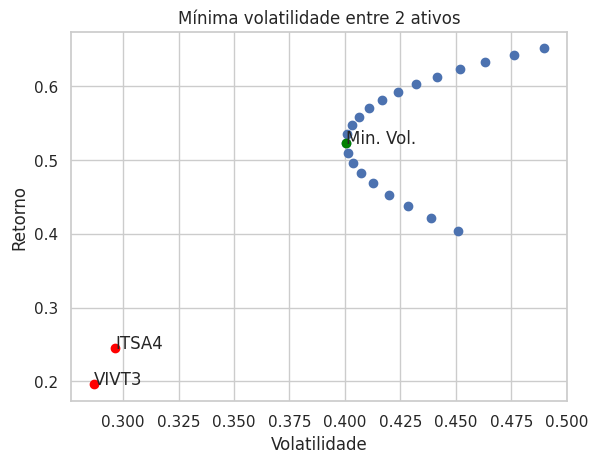

In [ ]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");
plt.title('Mínima volatilidade entre 2 ativos')

plt.scatter(vol_aa['ITSA4.SA'], ret_aa['ITSA4.SA'], color='red');
plt.text(vol_aa['ITSA4.SA'], ret_aa['ITSA4.SA'], 'ITSA4');

plt.scatter(vol_aa['VIVT3.SA'], ret_aa['VIVT3.SA'], color='red');
plt.text(vol_aa['VIVT3.SA'], ret_aa['VIVT3.SA'], 'VIVT3');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [ ]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print(f"Ret aa: {round(ret_aa, 2)}\n")
vol_aa = dados_chg.std()*np.sqrt(252)
print(f"Vol aa: {round(vol_aa, 2)}\n")

Ret aa: Ticker
GOLL4.SA   -0.28
ITSA4.SA    0.25
PETR3.SA    0.65
RENT3.SA    0.43
VALE3.SA    0.40
VIVT3.SA    0.20
PORT1       0.52
dtype: float64

Vol aa: Ticker
GOLL4.SA    0.77
ITSA4.SA    0.30
PETR3.SA    0.49
RENT3.SA    0.42
VALE3.SA    0.45
VIVT3.SA    0.29
PORT1       0.40
dtype: float64



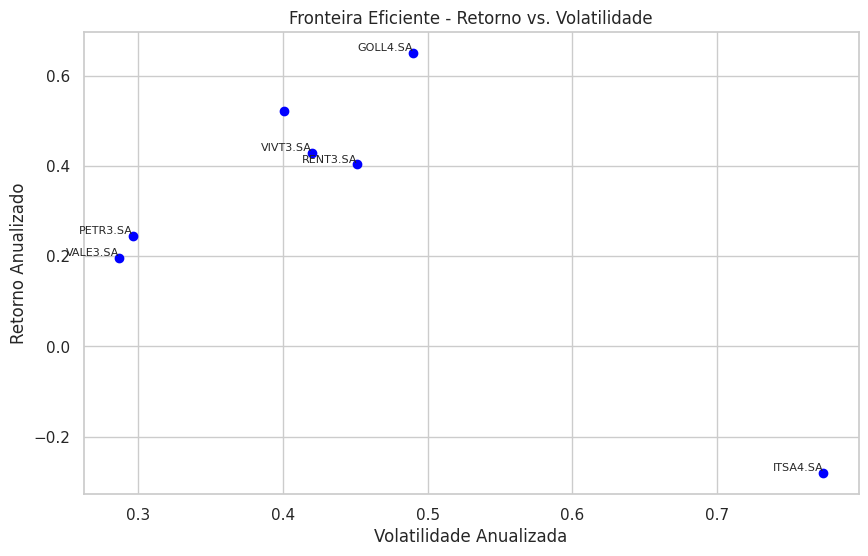

In [ ]:
# Plotar gráfico de retorno anualizado e volatilidade anualizada das ações do portifólio
plt.figure(figsize=(10, 6))
plt.scatter(vol_aa, ret_aa, color='blue')

for i in range(len(acoes)):
    plt.text(vol_aa[i], ret_aa[i], acoes[i], fontsize=8, ha='right', va='bottom')

plt.xlabel('Volatilidade Anualizada')
plt.ylabel('Retorno Anualizado')
plt.title('Fronteira Eficiente - Retorno vs. Volatilidade')
plt.grid(True)
plt.show()


In [ ]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

GOLL4.SA   -93.445993
ITSA4.SA   -46.526561
PETR3.SA   -66.764119
RENT3.SA   -57.911074
VALE3.SA   -67.580275
VIVT3.SA   -33.223514
PORT1      -64.756374
dtype: float64


Text(0.5, 1.0, 'Dropdown - Ações + Portifólio')

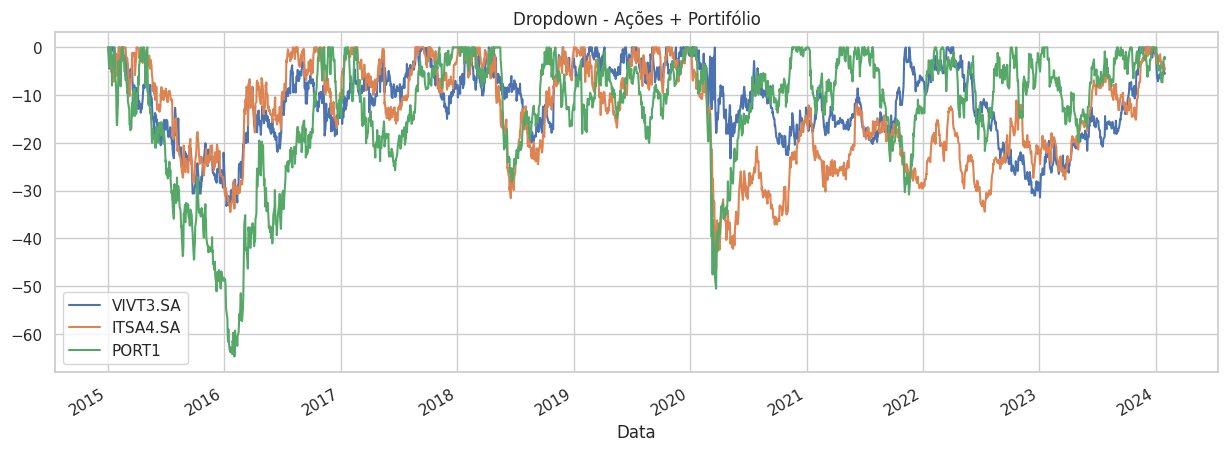

In [ ]:
ddown[['VIVT3.SA', 'ITSA4.SA', 'PORT1']].plot(figsize = (15,5));
plt.title('Dropdown - Ações + Portifólio')

In [ ]:
dados=dados.drop(['PORT1'], axis=1)
dados_chg=dados_chg.drop(['PORT1'], axis=1)

In [ ]:
#Portfolio com 3 ativos: ITSA4, VALE3 e VIVT3
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0, 0, 0]
for w1 in range(0, 101, 5):
  for w2 in range(0, 101-w1, 5):
    ret, vol = calc_ret_vol(dados, dados_chg, [0, 0, w1/100, 0, w2/100, (1-w1/100-w2/100)])
    print(f"Aloc:{round(w1/100, 2):.2f} {round(w2/100, 2):.2f} {round(1-w1/100-w2/100, 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
    points.append([ret, vol])
    if vol < min_vol_ret[0]:
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      port_pesos[2] = w1/100
      port_pesos[4] = w2/100
      port_pesos[5] = 1-w1/100-w2/100

Aloc:0.00 0.00 1.00 Ret:0.196 Vol:0.287
Aloc:0.00 0.05 0.95 Ret:0.210 Vol:0.273
Aloc:0.00 0.10 0.90 Ret:0.224 Vol:0.265
Aloc:0.00 0.15 0.85 Ret:0.237 Vol:0.262
Aloc:0.00 0.20 0.80 Ret:0.250 Vol:0.263
Aloc:0.00 0.25 0.75 Ret:0.262 Vol:0.267
Aloc:0.00 0.30 0.70 Ret:0.274 Vol:0.273
Aloc:0.00 0.35 0.65 Ret:0.285 Vol:0.281
Aloc:0.00 0.40 0.60 Ret:0.296 Vol:0.290
Aloc:0.00 0.45 0.55 Ret:0.306 Vol:0.301
Aloc:0.00 0.50 0.50 Ret:0.316 Vol:0.312
Aloc:0.00 0.55 0.45 Ret:0.326 Vol:0.324
Aloc:0.00 0.60 0.40 Ret:0.336 Vol:0.336
Aloc:0.00 0.65 0.35 Ret:0.345 Vol:0.349
Aloc:0.00 0.70 0.30 Ret:0.354 Vol:0.363
Aloc:0.00 0.75 0.25 Ret:0.363 Vol:0.377
Aloc:0.00 0.80 0.20 Ret:0.372 Vol:0.391
Aloc:0.00 0.85 0.15 Ret:0.380 Vol:0.405
Aloc:0.00 0.90 0.10 Ret:0.388 Vol:0.420
Aloc:0.00 0.95 0.05 Ret:0.396 Vol:0.436
Aloc:0.00 1.00 0.00 Ret:0.404 Vol:0.451
Aloc:0.05 0.00 0.95 Ret:0.240 Vol:0.277
Aloc:0.05 0.05 0.90 Ret:0.253 Vol:0.266
Aloc:0.05 0.10 0.85 Ret:0.265 Vol:0.261
Aloc:0.05 0.15 0.80 Ret:0.277 Vol:0.260


In [ ]:
print(min_vol_ret)
print(port_pesos)

[0.25971802278776773, 0.2765039013701911]
[0, 0, 0.05, 0, 0.15, 0.7999999999999999]


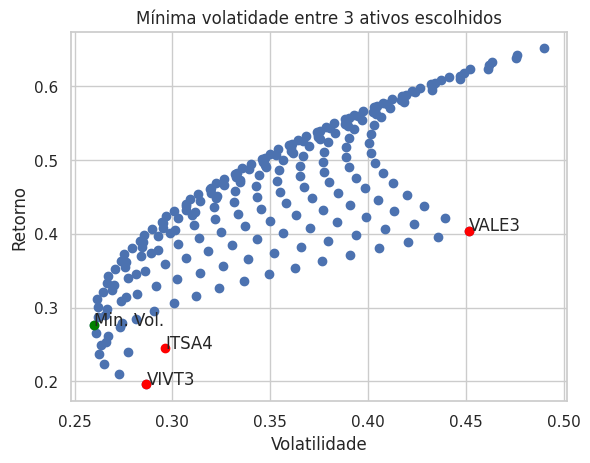

In [ ]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");
plt.title('Mínima volatidade entre 3 ativos escolhidos')

plt.scatter(vol_aa['VIVT3.SA'], ret_aa['VIVT3.SA'], color='red');
plt.text(vol_aa['VIVT3.SA'], ret_aa['VIVT3.SA'], 'VIVT3');

plt.scatter(vol_aa['VALE3.SA'], ret_aa['VALE3.SA'], color='red');
plt.text(vol_aa['VALE3.SA'], ret_aa['VALE3.SA'], 'VALE3');

plt.scatter(vol_aa['ITSA4.SA'], ret_aa['ITSA4.SA'], color='red');
plt.text(vol_aa['ITSA4.SA'], ret_aa['ITSA4.SA'], 'ITSA4');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [ ]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = (dados - dados.shift(1)) / dados.shift(1)
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print(f"Ret aa: {round(ret_aa, 2)}\n")
vol_aa = dados_chg.std()*np.sqrt(252)
print(f"Vol aa: {round(vol_aa, 2)}\n")

Ret aa: Ticker
GOLL4.SA   -0.28
ITSA4.SA    0.25
PETR3.SA    0.65
RENT3.SA    0.43
VALE3.SA    0.40
VIVT3.SA    0.20
PORT1       0.28
dtype: float64

Vol aa: Ticker
GOLL4.SA    0.77
ITSA4.SA    0.30
PETR3.SA    0.49
RENT3.SA    0.42
VALE3.SA    0.45
VIVT3.SA    0.29
PORT1       0.26
dtype: float64



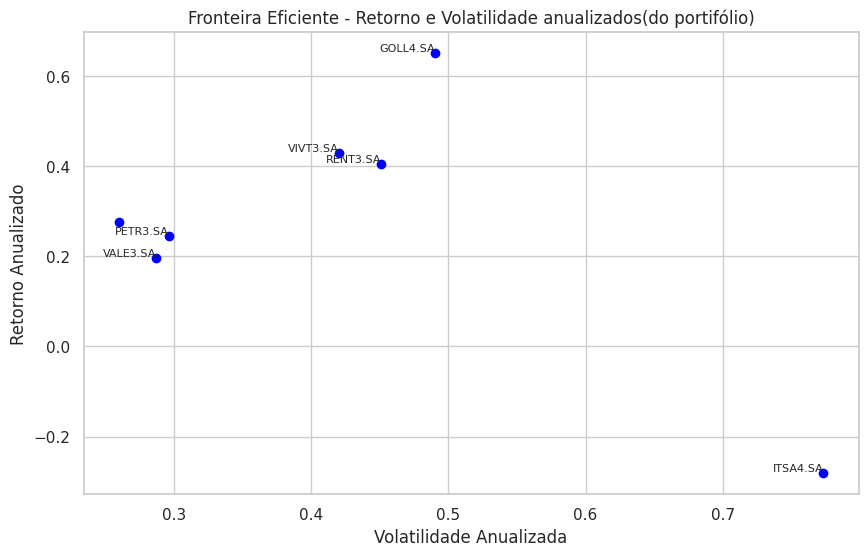

In [ ]:
# Plotar gráfico de retorno anualizado e volatilidade anualizada das ações do portifólio
plt.figure(figsize=(10, 6))
plt.scatter(vol_aa, ret_aa, color='blue')

# Adicionar indicativo de cada ponto (nome da ação)
for i in range(len(acoes)):
    plt.text(vol_aa[i], ret_aa[i], acoes[i], fontsize=8, ha='right', va='bottom')

plt.xlabel('Volatilidade Anualizada')
plt.ylabel('Retorno Anualizado')
plt.title('Fronteira Eficiente - Retorno e Volatilidade anualizados(do portifólio)')
plt.grid(True)
plt.show()

In [ ]:
#Calcular drawdown (valor de queda de um ativo em comparação ao valor máximo de cotação anterior)
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

GOLL4.SA   -93.445993
ITSA4.SA   -46.526561
PETR3.SA   -66.764119
RENT3.SA   -57.911074
VALE3.SA   -67.580275
VIVT3.SA   -33.223514
PORT1      -36.770366
dtype: float64


Text(0.5, 1.0, 'Dropdown - 3 ativos + portifólio')

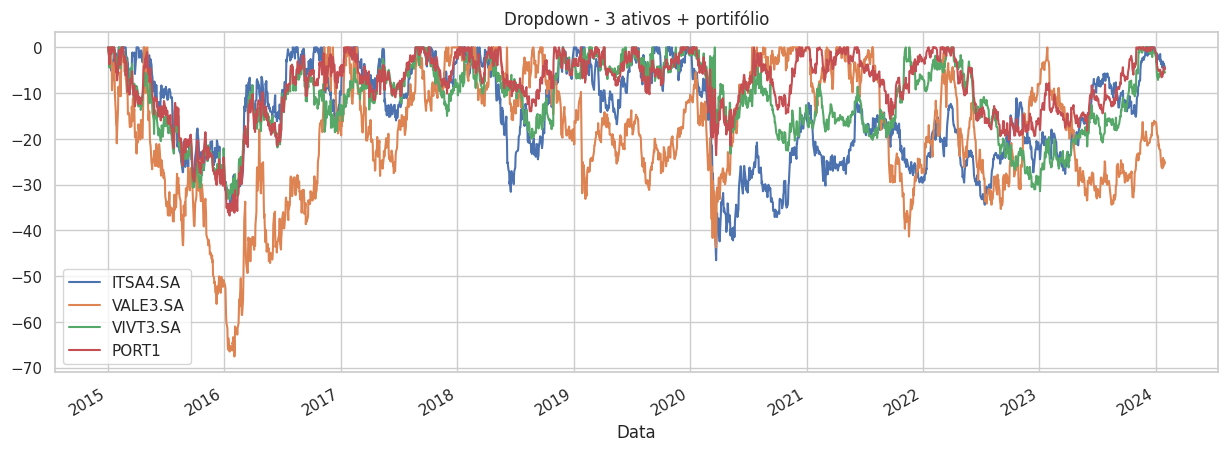

In [ ]:
ddown[['ITSA4.SA', 'VALE3.SA', 'VIVT3.SA', 'PORT1']].plot(figsize = (15,5));
plt.title('Dropdown - 3 ativos + portifólio')


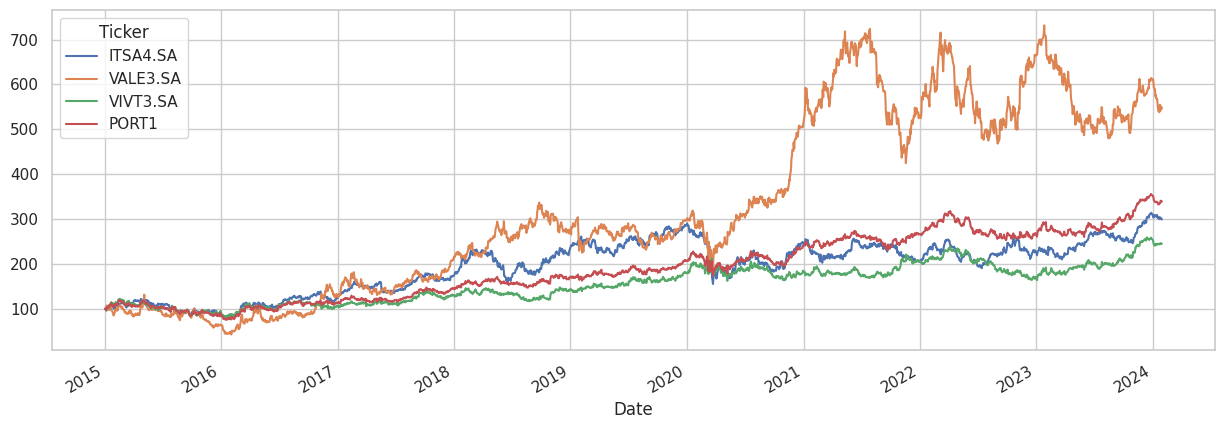

In [ ]:
dados[['ITSA4.SA', 'VALE3.SA', 'VIVT3.SA', 'PORT1']].plot(figsize = (15,5));